## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv("C:\\Users\\bevli\\Downloads\\results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
dffifa = df[df['tournament'] == 'FIFA World Cup']

In [4]:
dfconcat = pd.concat([dffifa[['away_team','away_score']].rename(columns = {'away_team': 'team', 'away_score':'score'}),
                     dffifa[['home_team','home_score']].rename(columns = {'home_team': 'team', 'home_score':'score'})]).groupby('team').sum('score')\
.sort_values('score' , ascending = False).reset_index().head(6)
dfconcat

,team,score
0,Brazil,229
1,Germany,226
2,Argentina,137
3,Italy,128
4,France,120
5,Spain,99


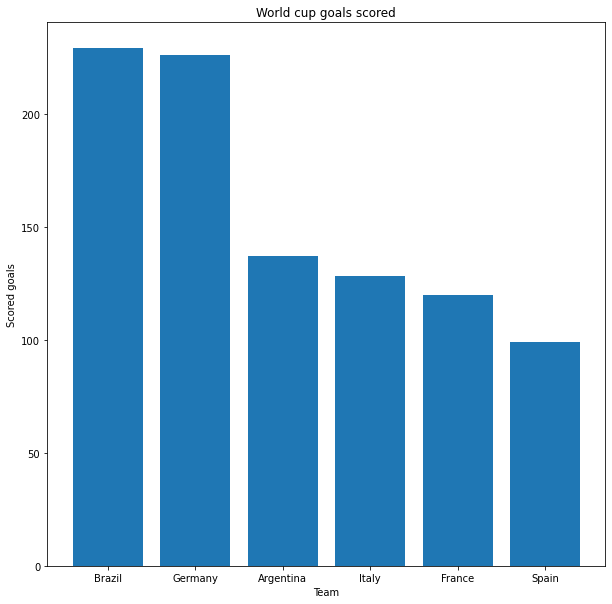

In [52]:
fig,ax = plt.subplots(figsize=(10,10))
ax.bar(dfconcat['team'], dfconcat['score'])
ax.set_xlabel('Team')
ax.set_ylabel('Scored goals')
ax.set_title('World cup goals scored')

plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [30]:
df_plot = df['tournament'].value_counts().head(10).reset_index().rename(columns={'index':'Tournament','tournament':'matches'})
df_plot

,Tournament,matches
0,Friendly,17029
1,FIFA World Cup qualification,7236
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1672
4,FIFA World Cup,900
5,Copa América,813
6,AFC Asian Cup qualification,724
7,African Cup of Nations,690
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


In [53]:
data = go.Bar(x=df_plot['Tournament'], y=df_plot['matches'])
layout = go.Layout(title = 'Tournament matches', # Graph title
                   xaxis = dict(title = 'Tournament'), # x-axis label
                   yaxis = dict(title = 'Matches played')) # y-axis label
fig = go.Figure(data = data, layout = layout)
fig.show()

## Task 
Show the trend in number of matches per year.

In [57]:
df['date'] = pd.to_datetime(df['date'])

In [61]:
df_plot = df['date'].dt.year.value_counts().reset_index().rename(columns = {'index':'year','date':'matches'})

,year,matches
0,2019,1155
1,2008,1091
2,2011,1081
3,2004,1064
4,2000,1026
...,...,...
144,1876,2
145,1874,1
146,1873,1
147,1875,1


In [62]:
data = [go.Scatter(x=df_plot['year'], y=df_plot['matches'])]
layout = go.Layout(title = 'Count matches per year', # Graph title
                   xaxis = dict(title = 'Year'), # x-axis label
                   yaxis = dict(title = 'Matches played')) # y-axis label
fig = go.Figure(data = data, layout = layout)
fig.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [64]:
def winner_is(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return 'draw'

df['winner'] = df.apply(winner_is, axis=1)\

df_count_wins = df['winner'].value_counts()\
                            .rename_axis('team')\
                            .to_frame('wins')\
                            .reset_index()\
                            .query('team != "draw"')

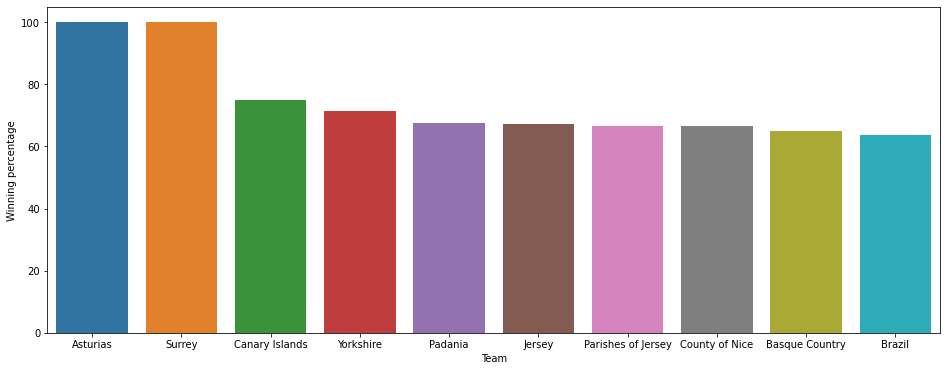

In [66]:
df_matches_played = df['home_team'].value_counts().rename_axis('team').to_frame('matches').add(
                    df['away_team'].value_counts().rename_axis('team').to_frame('matches'), fill_value=0)\
                    .reset_index()

df_plot = df_count_wins.merge(df_matches_played, left_on = 'team', right_on = 'team', how = 'inner')
df_plot['pct_wins'] = df_plot['wins'].divide(df_plot['matches']) * 100
df_plot = df_plot.sort_values('pct_wins',ascending=False)


plt.figure(figsize=(16, 6))
ax = sns.barplot(x="team", y="pct_wins", data=df_plot.head(10))
ax.set_xlabel('Team')
ax.set_ylabel('Winning percentage')
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

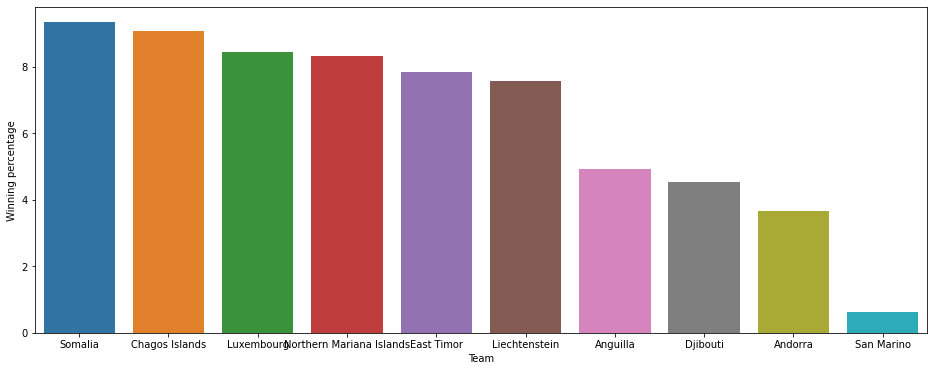

In [67]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="team", y="pct_wins", data=df_plot.tail(10))
ax.set_xlabel('Team')
ax.set_ylabel('Winning percentage')
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [83]:
df_plot = df['date'].dt.month.value_counts().to_frame('matches').rename_axis('month')\
            .reset_index().sort_values('month')

In [85]:
df_plot
data = [go.Scatter(x=df_plot['month'], y=df_plot['matches'])]
layout = go.Layout(title = 'Count matches per month', # Graph title
                   xaxis = dict(title = 'Month'), # x-axis label
                   yaxis = dict(title = 'Matches played')) # y-axis label
fig = go.Figure(data = data, layout = layout)
fig.show()